In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


def smooth(data, sm=10):
    '''
    :param data:
    :param sm: sm表示滑动窗口大小,为2*k+1,
    :return: smooth data
    '''
    smooth_data = []
    if sm > 1:
        for d in data:
            y = np.ones(sm)*1.0/sm
            d = np.convolve(y, d, "same")
            smooth_data.append(d)
    return smooth_data


def smoothing(data, sm=20):
    '''
    :param data:
    :param sm: sm表示滑动窗口大小,
    :return: smooth data
    '''
    data_smooth = []
    for i, j in enumerate(data):
        index_left = i - int(sm / 2) if (i - int(sm / 2)) >= 0 else 0
        index_right = i + int(sm / 2) if (i + int(sm / 2)
                                          ) < len(data) else len(data) - 1
        data_smooth.append(
            sum(data[index_left:index_right])/len(data[index_left:index_right]))
    return data_smooth


def get_max_min_mean(data, sm):
    '''
    :param data:
    :param sm:
    :return:
    '''
    data_max = []
    data_min = []
    data_mean = []
    for i, j in enumerate(data):
        index_left = i - int(sm / 2) if (i - int(sm / 2)) >= 0 else 0
        index_right = i + int(sm / 2) if (i + int(sm / 2)
                                          ) < len(data) else len(data) - 1
        data_max.append(max(data[index_left:index_right]))
        data_min.append(min(data[index_left:index_right]))
        data_mean.append(
            sum(data[index_left:index_right])/len(data[index_left:index_right]))
    return data_max, data_min, data_mean


In [8]:
def draw_line(data_file, label, color, max_min_mean_sm=6, smooth_sm=40):
    data = pd.read_csv(filepath_or_buffer=data_file)
    data_x = data['Step']
    data_y = data['Value']

    data_max_y, data_min_y, data_mean_y = get_max_min_mean(
        data_y, sm=max_min_mean_sm)

    data_max_smooth_y = smoothing(data=data_max_y, sm=smooth_sm)
    data_min_smooth_y = smoothing(data=data_min_y, sm=smooth_sm)
    data_mean_smooth_y = smoothing(data=data_mean_y, sm=smooth_sm)

    plt.plot(data_x, data_mean_smooth_y,
             color=color, label=label, linewidth='2')
    plt.fill_between(data_x,
                     data_min_smooth_y,
                     data_mean_smooth_y,
                     facecolor=color,
                     alpha=0.3)
    plt.fill_between(data_x,
                     data_mean_smooth_y,
                     data_max_smooth_y,
                     facecolor=color,
                     alpha=0.3)


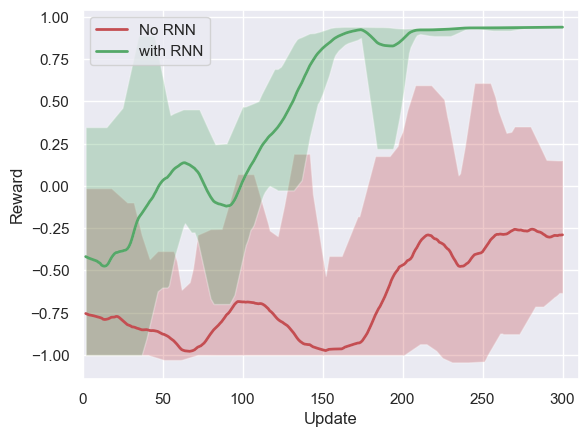

In [9]:
plt.figure()
data_files_path = [r'./Reward/rnn/Hallway_No_RNN-tag-Train_reward_mean.csv',
                      r'./Reward/rnn/Hallway_with_RNN-tag-Train_reward_mean.csv',
                   #    r'./Reward/run-CarRacing-v1_lstm_continue_run_1-tag-Train_reward_mean.csv'
                   ]
labels = ['No RNN',
            'with RNN',
          #   'continue_sigma'
          ]
colors = ['r',
          'g',
        #   'b'
          ]
smooth_sms = [10,
              10,
            #   10
              ]

x_len = 0
for data_file_path, label, color, smooth_sm in zip(data_files_path, labels, colors, smooth_sms):
    draw_line(data_file=data_file_path,
              label=label,
              color=color,
              max_min_mean_sm=20,
              smooth_sm=smooth_sm)
# figure的具体设置需要在直线等画完了在进行
plt.xlabel("Update")  # 横坐标名字
plt.ylabel("Reward")  # 纵坐标名字
plt.legend(loc="best")  # 图例
plt.xlim(0, 310)
plt.savefig("Reward.png", dpi=500)
plt.show()
